In [1]:
# Transformed code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [3]:
# Transformed code
data_frame = pd.read_csv("tips (data for regression problem).csv")
data_frame.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Transformed code
missing_values = data_frame.isnull().sum()
missing_values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Modified: The data doesn't have any missing values.

In [5]:
# Transformed code
data_frame.replace({'Yes': 1, 'No': 0, 'Dinner': 1,'Lunch': 0, 'Male': 1, 'Female': 0, 'Thur': 0, 'Fri':1, 'Sat' : 2, 'Sun' : 3}, inplace=True)
data_frame.head()

/var/folders/y9/5mj0xxqn1xld71z_d25493sr0000gn/T/ipykernel_30514/627906482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0, 'Dinner': 1,'Lunch': 0, 'Male': 1, 'Female': 0, 'Thur': 0, 'Fri':1, 'Sat' : 2, 'Sun' : 3}, inplace=True)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### Modified: We have now transformed the categorical data into numerical data.

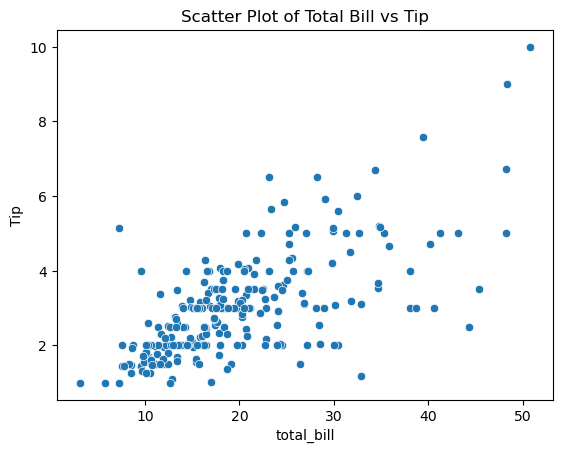

In [6]:
# Transformed code

seaborn_plot.scatterplot(x='total_bill', y='tip', data=data_frame)
plot_lib.title(f'Scatter Plot of Total Bill vs Tip')
plot_lib.xlabel('total_bill')
plot_lib.ylabel('Tip')
plot_lib.show()

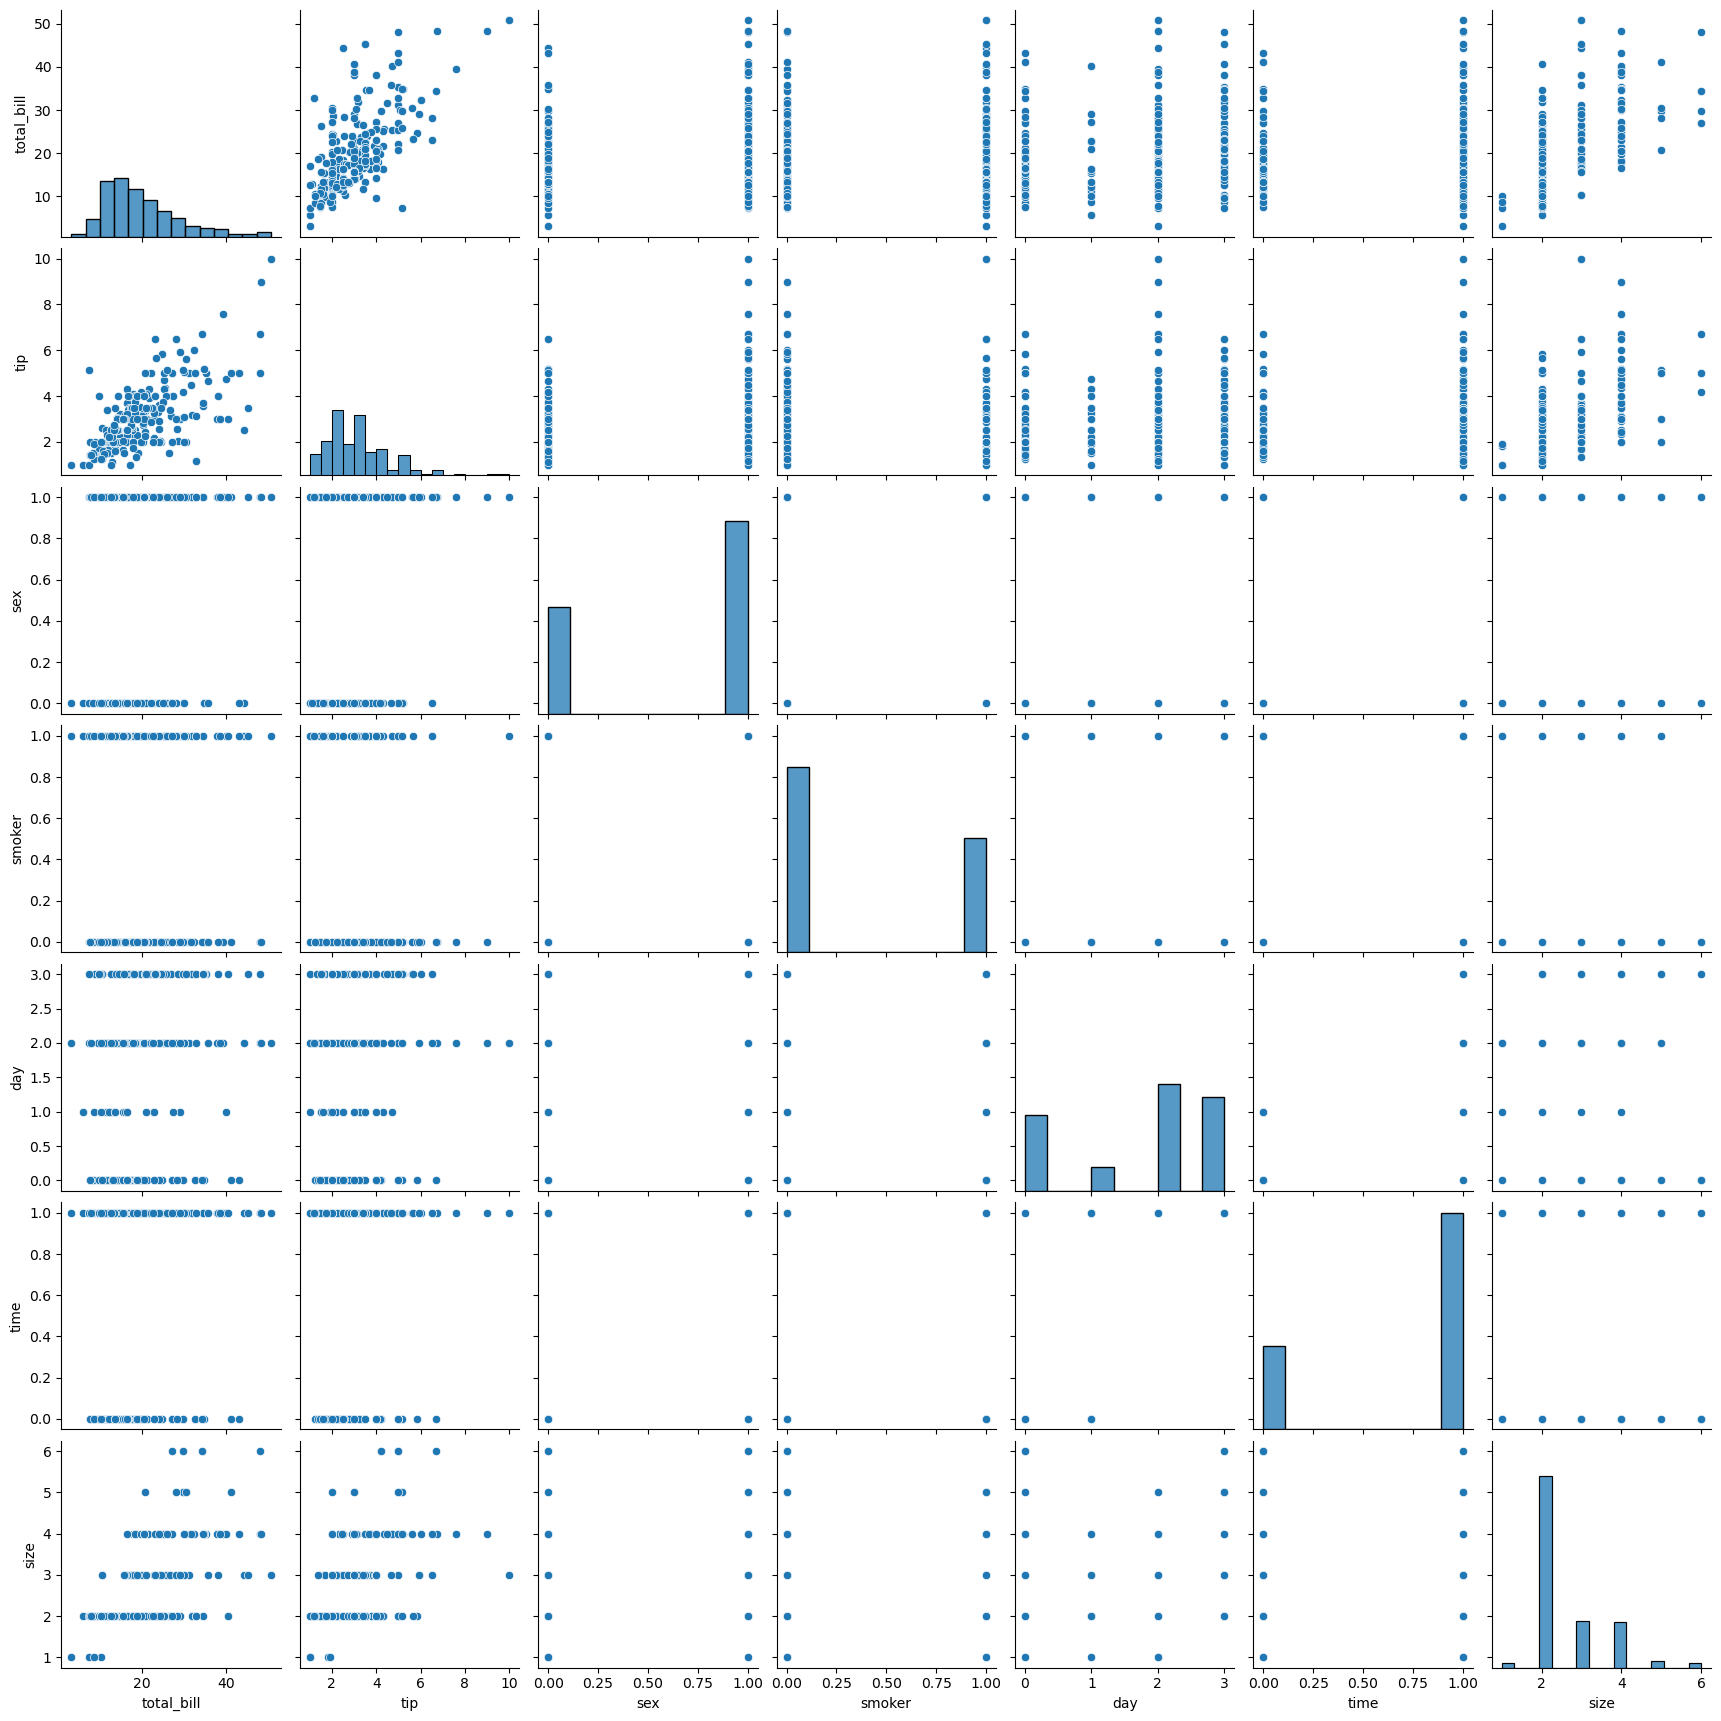

In [7]:
# Transformed code
seaborn_plot.pairplot(data_frame)
plot_lib.show()

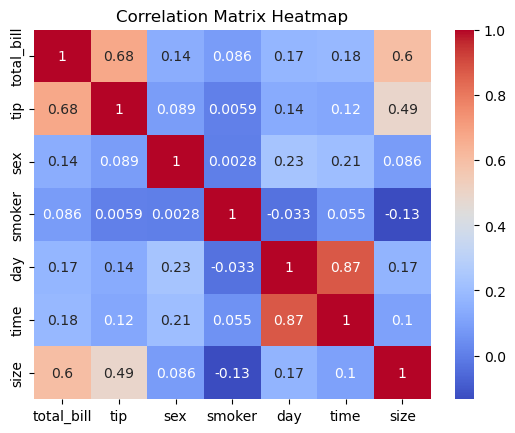

In [8]:
# Transformed code
corr_matrix = data_frame.corr()
seaborn_plot.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plot_lib.title('Correlation Matrix Heatmap')
plot_lib.show()

Linear Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Ridge Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Lasso Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Decision Tree Rainbow Test Statistic: nan, p-value: nan
Random Forest Rainbow Test Statistic: nan, p-value: nan
SVR Rainbow Test Statistic: nan, p-value: nan
KNN Rainbow Test Statistic: nan, p-value: nan


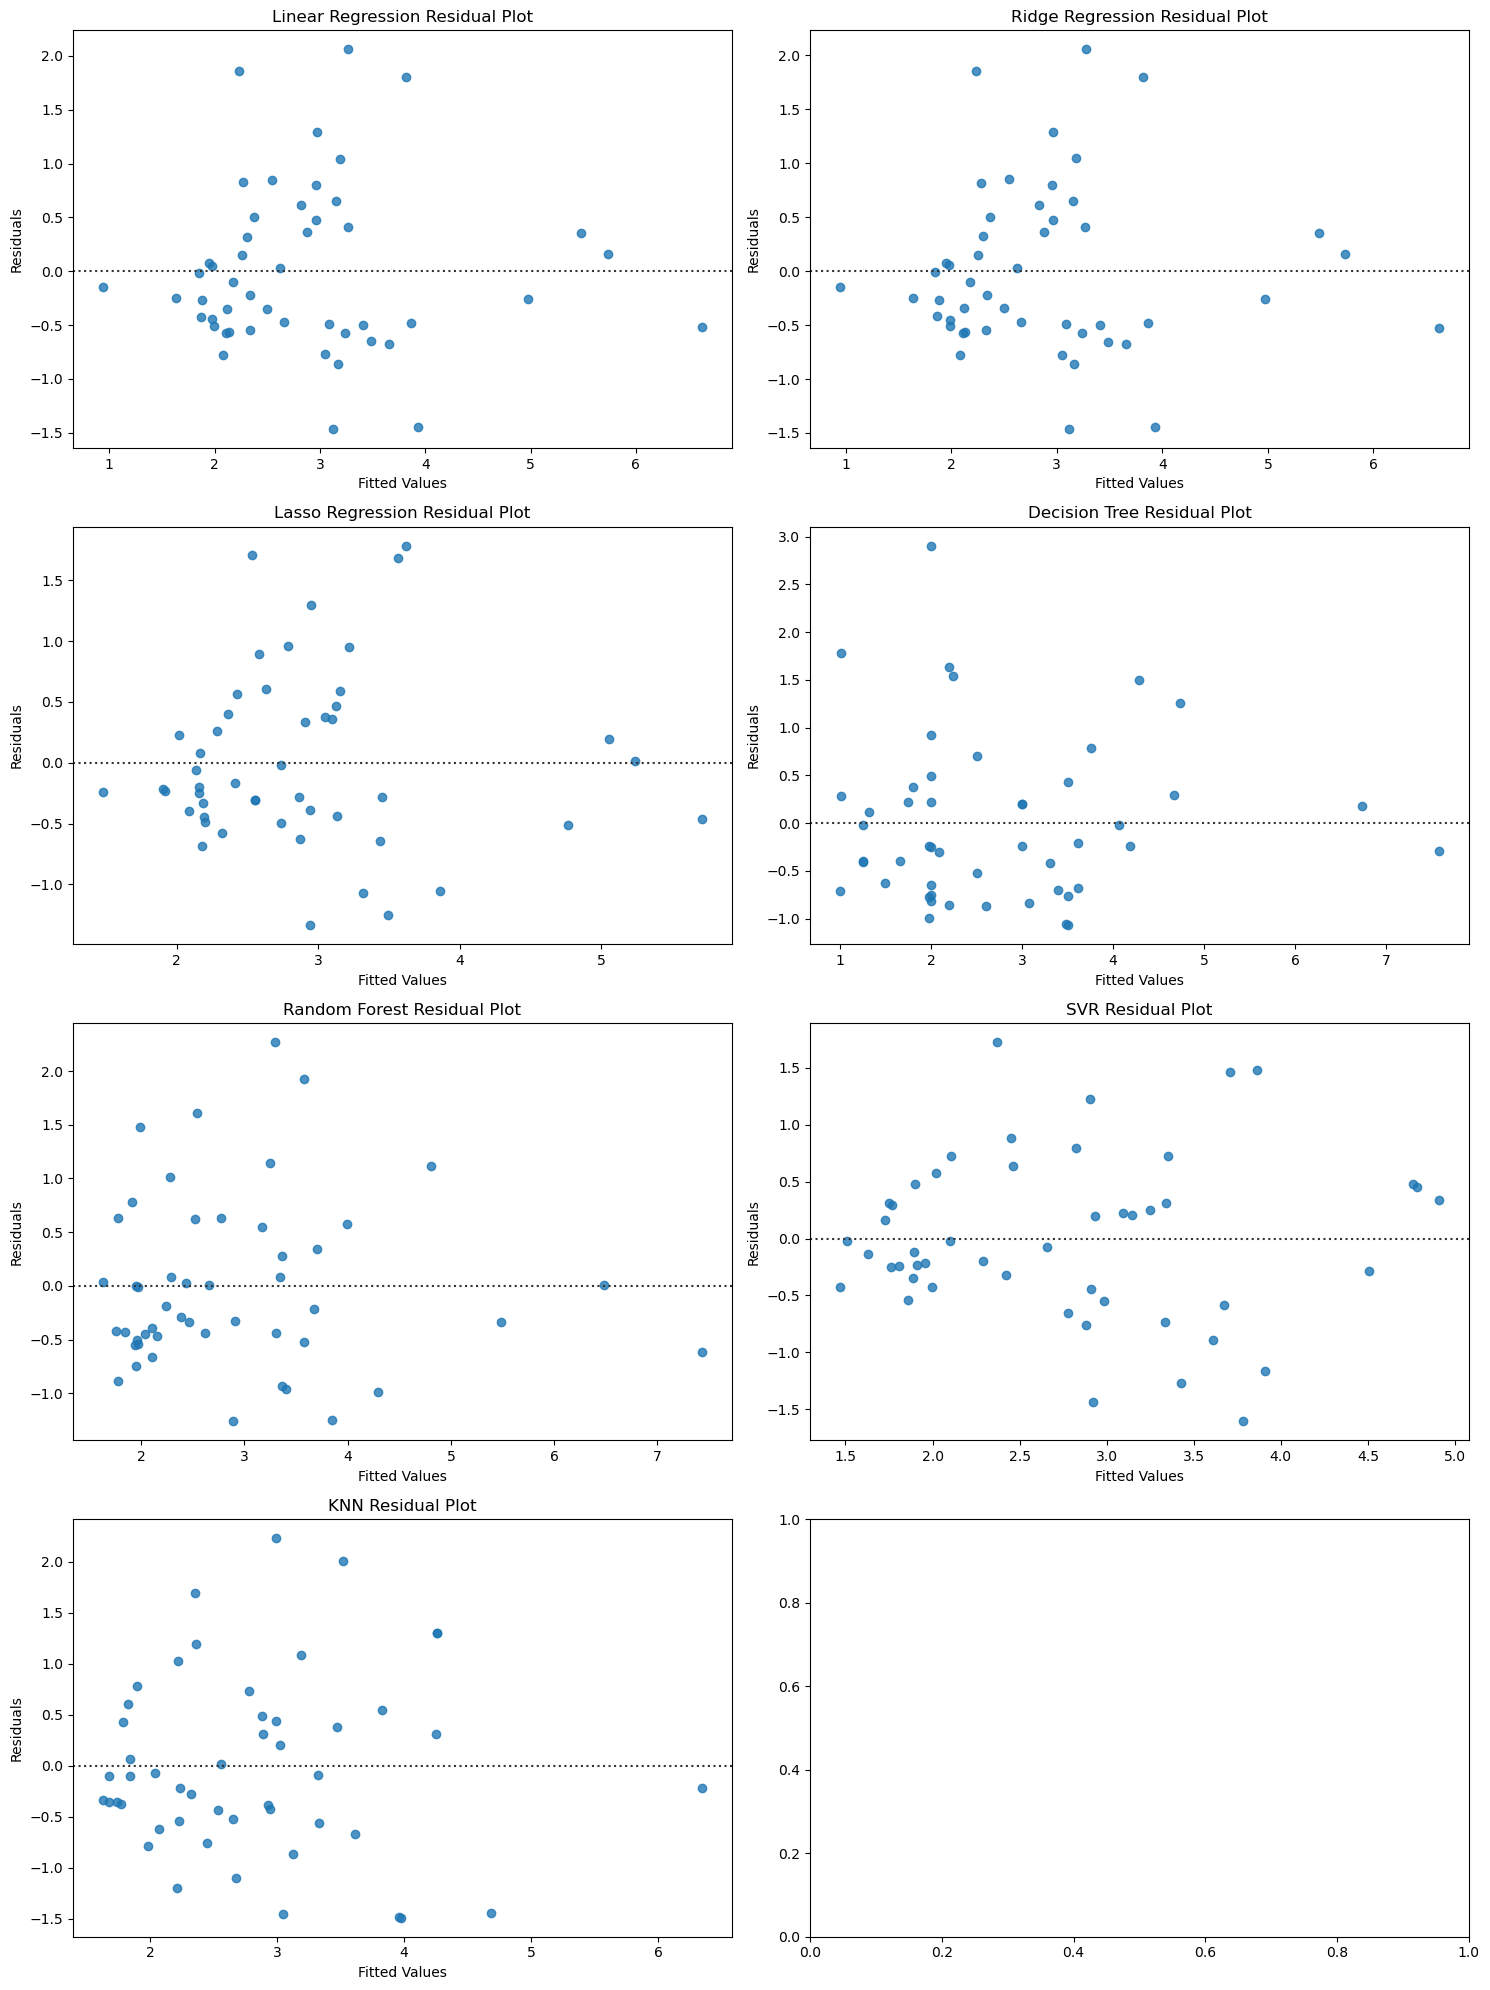

In [9]:
# Transformed code
X = data_frame.drop('tip', axis=1)
y = data_frame['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

fig, axes = plot_lib.subplots(4, 2, figsize=(15, 20))

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    if isinstance(model, LinearRegression) or isinstance(model, Ridge) or isinstance(model, Lasso):
        X_with_const = sm.add_constant(X_test) 
        ols_model = sm.OLS(y_test, X_with_const).fit()  
        rainbow_statistic, rainbow_p_value = linear_rainbow(ols_model)
    else:
        rainbow_statistic, rainbow_p_value = np.nan, np.nan 
    
    ax = axes[idx // 2, idx % 2]
    seaborn_plot.residplot(x=y_pred, y=residuals, line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f'{model_name} Residual Plot')
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    
    print(f"{model_name} Rainbow Test Statistic: {rainbow_statistic}, p-value: {rainbow_p_value}")

plot_lib.tight_layout()
plot_lib.show()

### Modified: From the above analysis of rainbow statistics and residual plots we can conclude:

1. The residual plots of the linear models are randomly scattered around zero with no discernible pattern, suggesting that the linearity assumption holds and the model is well-specified.
2. The Rainbow Test for linear models (Linear Regression, Ridge, and Lasso) returns p-values greater than 0.05 (around 0.53), which suggests that the linearity assumption might not be violated. This indicates that the linear models are reasonably well-specified for this dataset. However, the p-value is not very low, meaning there might be some non-linear relationships not captured by these models.

In [10]:
# Transformed code
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
        })
        
        print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")
        print('-' * 40)
    
    return pd.DataFrame(results)

model_results = evaluate_models(X_train, X_test, y_train, y_test)

model_results.sort_values(by='R2', ascending=False, inplace=True)
print(model_results)

Linear Regression - MAE: 0.67, RMSE: 0.83, R2: 0.44
----------------------------------------
Ridge Regression - MAE: 0.67, RMSE: 0.83, R2: 0.44
----------------------------------------
Lasso Regression - MAE: 0.63, RMSE: 0.75, R2: 0.55
----------------------------------------
Decision Tree - MAE: 0.83, RMSE: 1.09, R2: 0.04
----------------------------------------
Random Forest - MAE: 0.76, RMSE: 0.96, R2: 0.27
----------------------------------------
SVR - MAE: 0.57, RMSE: 0.73, R2: 0.57
----------------------------------------
KNN - MAE: 0.72, RMSE: 0.93, R2: 0.30
----------------------------------------
               Model       MAE      RMSE        R2
5                SVR  0.569697  0.730294  0.573327
2   Lasso Regression  0.625610  0.752727  0.546712
1   Ridge Regression  0.667930  0.832910  0.444996
0  Linear Regression  0.668573  0.834451  0.442940
6                KNN  0.722286  0.932529  0.304295
4      Random Forest  0.764082  0.957466  0.266590
3      Decision Tree  0.831020

### Modified: 1. SVR and Lasso Regression give the best performance in terms of R² (both ~0.57), which indicates that these models explain over 50% of the variation in the tip amount.
2. Lasso performs slightly better than Ridge and Linear Regression with a lower MAE and RMSE, suggesting that Lasso’s ability to shrink coefficients might be beneficial here.
3. Random Forest and KNN provide decent predictions but fall behind SVR and Lasso, with Random Forest having a relatively lower R² of 0.25.
4. Decision Tree has the worst performance, with a negative R² (-0.06), indicating that it does not fit the data well.

In [11]:
# Transformed code
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

print("Lasso Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

Lasso Coefficients:
total_bill: 0.10179221447276698
sex: -0.0
smoker: -0.0
day: 0.0
time: -0.0
size: 0.030751178048733778


In [31]:
# Transformed code
rf = RandomForestRegressor()
rf.fit(X, y)

print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"{feature}: {importance}")

Random Forest Feature Importances:
total_bill: 0.7877369512501314
sex: 0.020689162693233742
smoker: 0.06695663519437117
day: 0.053920557749339064
time: 0.01242397265384278
size: 0.058272720459081696


### Modified: 1.	total_bill: Both models (Lasso and Random Forest) clearly indicate that total_bill is the most important factor for predicting tip amounts. This is logical since tips are often a percentage of the total bill, so a higher bill leads to a higher tip.
2.	size: size is the second most important factor, both in terms of Lasso coefficient and Random Forest importance. Larger parties typically leave larger tips, which aligns with the model’s predictions.
3.	sex, smoker, day, and time: These features do not seem to have a significant impact on the tip amount. The coefficients and feature importance scores suggest that these variables have little influence on predicting tips. This could be because these factors don’t directly affect tipping behavior in this dataset.

### Modified: Actionable Insights for Management:

1. Focus on total bill: Since total_bill is the most significant factor, management should ensure that customers who spend more are provided with excellent service. This could include offering personalized service or upselling techniques to increase the total bill, which will, in turn, increase the tip.
2. Cater to larger parties: Since size is also important, encouraging larger groups could increase total tips. Consider offering group discounts, promotions for large parties, or creating a group-friendly environment to attract larger parties.
3. Further investigation of smoker and day: Even though these features are not as impactful, the fact that they have some feature importance suggests that smokers might have different tipping patterns or that weekdays vs. weekends might influence tips. Management could consider experimenting with specific customer segments (e.g., smokers) or offer promotions targeting specific days of the week.

In [ ]:
# Transformed code
